# Subspace Score for Gemma 2

### Imports

In [15]:
import pandas as pd
import sys
sys.path.append("..")
import seaborn as sns
import matplotlib.pyplot as plt

from humor.vector_similarity_metric import vector_similarity_metric
from humor.bipartite_metric import bipartite_metric

ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')

gemma2 = pd.read_csv('/home/ada/humor/data/subspace_scores/scores_gemma-2-2b-it.csv')
gemma9 = pd.read_csv('/home/ada/humor/data/subspace_scores/scores_gemma-2-9b-it.csv')
gemma27 = pd.read_csv("/home/ada/humor/data/subspace_scores/scores_gemma-2-27b-it.csv")

gemma2_prompt = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma2_2 - gemma2 - gemma2.csv')
gemma9_prompt = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma2-9.csv')
gemma27_prompt = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma2_27 - gemma2 - gemma2.csv')

### Experiment

In [16]:
print("Subspace\n")
gemma2_score = gemma2["Score"].mean() * 100
print("Gemma 2B: ", gemma2_score)
gemma9_score = gemma9["Score"].mean() * 100
print("Gemma 9B: ", gemma9_score)
gemma27_score = gemma27["Score"].mean() * 100
print("Gemma 27B: ", gemma27_score)

print("Bipartite\n")
gemma2_bimetric = bipartite_metric(gemma2_prompt, ground_truth)
print("Gemma 2B: ", gemma2_bimetric.select_dtypes(include='number').mean())

gemma9_bimetric = bipartite_metric(gemma9_prompt, ground_truth)
print("Gemma 9B: ", gemma9_bimetric.select_dtypes(include='number').mean())

gemma27_bimetric = bipartite_metric(gemma27_prompt, ground_truth)
print("Gemma 27B: ", gemma27_bimetric.select_dtypes(include='number').mean())

print("\nSentence Embedding\n")
gemma2_vec_metric = vector_similarity_metric(gemma2_prompt, ground_truth)
print("Gemma 2B: ", gemma2_vec_metric.select_dtypes(include='number').mean())

gemma9_vec_metric = vector_similarity_metric(gemma9_prompt, ground_truth)
print("Gemma 9B: ", gemma9_vec_metric.select_dtypes(include='number').mean())

gemma27_vec_metric = vector_similarity_metric(gemma27_prompt, ground_truth)
print("Gemma 27B: ", gemma27_vec_metric.select_dtypes(include='number').mean())

Subspace

Gemma 2B:  35.9493175850195
Gemma 9B:  35.91184207037384
Gemma 27B:  28.21324564078275
Bipartite

Gemma 2B:  score    27.098347
dtype: float64
Gemma 9B:  score    35.184287
dtype: float64
Gemma 27B:  score    23.362894
dtype: float64

Sentence Embedding

Gemma 2B:  score    28.505246
dtype: float64
Gemma 9B:  score    35.863432
dtype: float64
Gemma 27B:  score    28.78914
dtype: float64


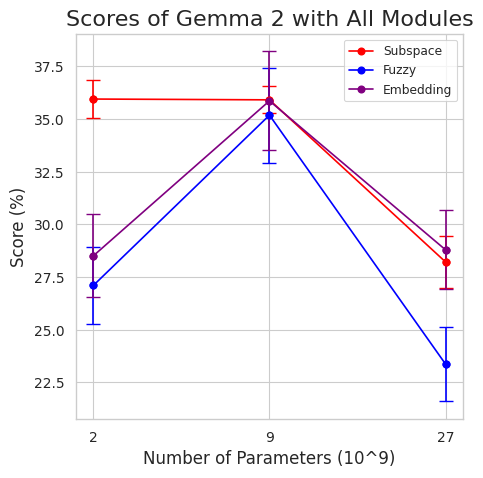

In [17]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")

means = [gemma2['Score'].mean()*100, gemma9['Score'].mean()*100, gemma27['Score'].mean()*100]
sems = [gemma2['Score'].sem()*100, gemma9['Score'].sem()*100, gemma27['Score'].sem()*100]
labels = ['2', '9', '27']

means_fuzzy = [gemma2_bimetric['score'].mean(), 
               gemma9_bimetric['score'].mean(),
               gemma27_bimetric['score'].mean()]
sems_fuzzy = [gemma2_bimetric['score'].sem(), 
               gemma9_bimetric['score'].sem(),
               gemma27_bimetric['score'].sem()]


means_embed = [gemma2_vec_metric['score'].mean(),
               gemma9_vec_metric['score'].mean(),
               gemma27_vec_metric['score'].mean()]
sems_embed = [gemma2_vec_metric['score'].sem(),
               gemma9_vec_metric['score'].sem(),
               gemma27_vec_metric['score'].sem()]

x_values = range(len(labels))

plt.plot(x_values, means, marker='o', linestyle='-', color='red', label='Subspace')
plt.errorbar(x_values, means, yerr=sems, fmt='o', color='red', capsize=5, linestyle='None') 

plt.plot(x_values, means_fuzzy, marker='o', linestyle='-', color='blue', label='Fuzzy')
plt.errorbar(x_values, means_fuzzy, yerr=sems_fuzzy, fmt='o', color='blue', capsize=5, linestyle='None') 

plt.plot(x_values, means_embed, marker='o', linestyle='-', color='purple', label='Embedding')
plt.errorbar(x_values, means_embed, yerr=sems_embed, fmt='o', color='purple', capsize=5, linestyle='None') 

plt.xticks(x_values, labels) 
plt.ylabel('Score (%)', fontsize=12)
plt.xlabel('Number of Parameters (10^9)', fontsize=12)
plt.title('Scores of Gemma 2 with All Modules', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend() 
plt.savefig("experiment_16.png", dpi=300, bbox_inches="tight")
plt.show()
